In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
segmentation_data = pd.read_csv('./../Datasets/SegmentationData.csv')
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2019 non-null   int64  
 1   Cell                     2019 non-null   int64  
 2   Case                     2019 non-null   object 
 3   Class                    2019 non-null   object 
 4   AngleCh1                 2019 non-null   float64
 5   AreaCh1                  2019 non-null   int64  
 6   AvgIntenCh1              2019 non-null   float64
 7   AvgIntenCh2              2019 non-null   float64
 8   AvgIntenCh3              2019 non-null   float64
 9   AvgIntenCh4              2019 non-null   float64
 10  ConvexHullAreaRatioCh1   2019 non-null   float64
 11  ConvexHullPerimRatioCh1  2019 non-null   float64
 12  DiffIntenDensityCh1      2019 non-null   float64
 13  DiffIntenDensityCh3      2019 non-null   float64
 14  DiffIntenDensityCh4     

In [3]:
segmentation_data.describe()

,Unnamed: 0,Cell,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,...,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
count,2019.000000,2.019000e+03,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,...,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,1010.000000,2.084024e+08,90.493405,320.336305,126.071679,189.052115,96.420171,140.701586,1.205859,0.895764,...,37245.123328,52258.089153,26759.650322,40551.359584,72.197502,98.554872,120.021172,17.623982,260.727093,177.343239
std,582.979416,2.790457e+05,48.760000,214.023533,165.008380,158.956105,96.666921,146.634665,0.202522,0.076108,...,61836.388435,46496.512752,27758.916848,46312.198211,79.690885,96.908200,112.108618,6.166931,140.365593,107.720132
min,1.000000,2.078276e+08,0.030876,150.000000,15.160401,1.000000,0.120000,0.563265,1.005831,0.510623,...,2382.000000,1.000000,24.000000,96.000000,11.466564,0.869253,2.301536,6.393216,9.000000,8.000000
25%,505.500000,2.083325e+08,53.892207,193.000000,35.364158,44.998572,33.495694,40.679739,1.065236,0.856972,...,9499.500000,14367.000000,8776.000000,9939.000000,25.302948,36.704721,47.426963,13.820393,142.000000,88.000000
50%,1010.000000,2.083843e+08,90.588773,253.000000,62.343173,173.506329,67.431250,90.250000,1.148620,0.913262,...,18285.000000,49220.000000,18749.000000,24839.000000,42.500015,69.116555,87.250451,16.187731,262.000000,165.000000
75%,1514.500000,2.084052e+08,126.682013,362.500000,143.187785,279.289699,127.341651,191.170427,1.280514,0.955606,...,35716.500000,72495.000000,35277.000000,55004.000000,81.771899,123.839112,159.136619,19.784021,382.000000,253.000000
max,2019.000000,2.109641e+08,179.939323,2186.000000,1418.634831,989.509804,1205.511538,886.837500,2.900320,0.996499,...,741411.000000,363311.000000,313433.000000,519602.000000,642.024719,757.020963,933.524313,54.744763,501.000000,501.000000


In [4]:
segmentation_data.head()

,Unnamed: 0,Cell,Case,Class,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,...,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
0,1,207827637,Test,PS,143.247705,185,15.711864,4.954802,9.548023,2.214689,...,2781,701,1690,392,12.474676,7.609035,2.714100,10.642974,42,14
1,2,207932307,Train,PS,133.752037,819,31.923274,206.878517,69.916880,164.153453,...,24964,160998,54675,128368,18.809225,56.715352,118.388139,32.161261,215,347
2,3,207932463,Train,WS,106.646387,431,28.038835,116.315534,63.941748,106.696602,...,11552,47511,26344,43959,17.295643,37.671053,49.470524,21.185525,371,252
3,4,207932470,Train,PS,69.150325,298,19.456140,102.294737,28.217544,31.028070,...,5545,28870,8042,8843,13.818968,30.005643,24.749537,13.392830,487,295
4,5,207932455,Test,PS,2.887837,285,24.275735,112.415441,20.474265,40.577206,...,6603,30306,5569,11037,15.407972,20.504288,45.450457,13.198561,283,159


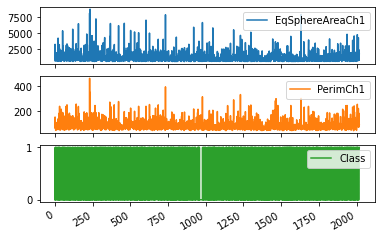

In [5]:
segmentation_data = segmentation_data.loc[:, ['EqSphereAreaCh1', 'PerimCh1', 'Class', 'Case']]
segmentation_data['Class'] = np.where(segmentation_data['Class'] == 'PS', 0, 1)
segmentation_data.plot(subplots=True);

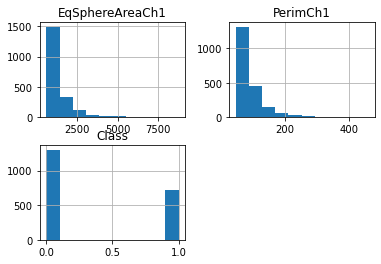

In [6]:
segmentation_data.hist();

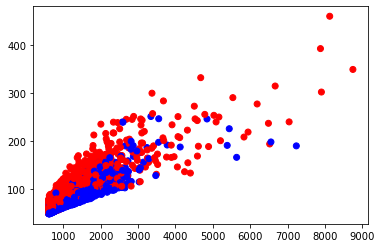

In [7]:
color = np.where(segmentation_data['Class'] == 0, 'r', 'b')
plt.scatter(segmentation_data['EqSphereAreaCh1'], segmentation_data['PerimCh1'], c = color);

In [8]:
train_data = segmentation_data[segmentation_data['Case'] == 'Train']
test_data = segmentation_data[segmentation_data['Case'] == 'Test']
x_train = train_data.loc[:, ['EqSphereAreaCh1', 'PerimCh1']]
y_train = train_data.loc[:, ['Class']]
x_test = test_data.loc[:, ['EqSphereAreaCh1', 'PerimCh1']]
y_test = test_data.loc[:, ['Class']]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1009, 2), (1009, 1), (1010, 2), (1010, 1))

In [9]:
simple_model = LogisticRegression()
simple_model.fit(x_train.values, y_train.values.ravel())
y_pred_prob_simple = simple_model.predict_proba(x_test.values)

In [10]:
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr);

0.7939489170555054


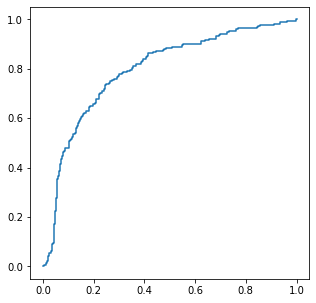

In [11]:
plot_roc_curve(y_test, y_pred_prob_simple)

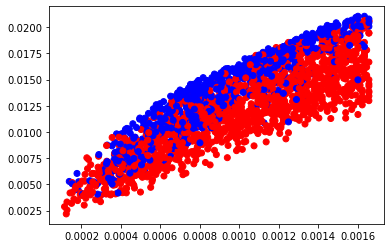

In [12]:
plt.scatter(np.reciprocal(segmentation_data['EqSphereAreaCh1']), np.reciprocal(segmentation_data['PerimCh1']), c = color);

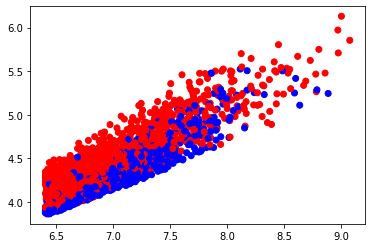

In [13]:
plt.scatter(np.log(segmentation_data['EqSphereAreaCh1']), np.log(segmentation_data['PerimCh1']), c = color);

In [14]:
x_train_inv = np.reciprocal(x_train)
x_test_inv = np.reciprocal(x_test)

In [15]:
inv_model = LogisticRegression()
inv_model.fit(x_train_inv.values, y_train.values.ravel())
y_pred_prob_inv = inv_model.predict_proba(x_test_inv.values)

0.5932690298767324


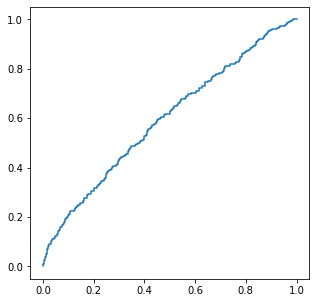

In [16]:
plot_roc_curve(y_test, y_pred_prob_inv)

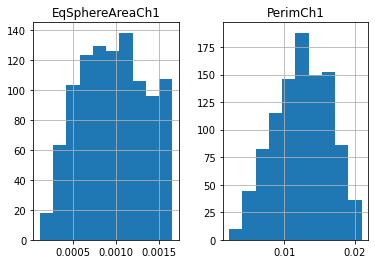

In [27]:
x_train_inv.hist();

In [29]:
x_train_inv_scaled = StandardScaler().fit_transform(x_train_inv)
x_test_inv_scaled = StandardScaler().fit_transform(x_test_inv)
inv_model = LogisticRegression()
inv_model.fit(x_train_inv_scaled, y_train.values.ravel())
y_pred_prob_inv = inv_model.predict_proba(x_test_inv_scaled)

0.8488186851452051


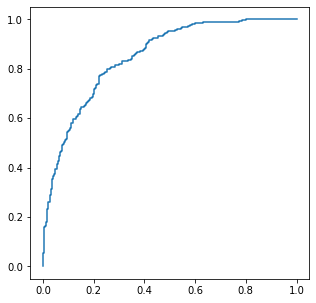

In [30]:
plot_roc_curve(y_test, y_pred_prob_inv)

In [17]:
x_train_log = np.log(x_train)
x_test_log = np.log(x_test)

In [18]:
log_model = LogisticRegression()
log_model.fit(x_train_log.values, y_train.values.ravel())
y_pred_prob_log = log_model.predict_proba(x_test_log.values)

0.829392715370151


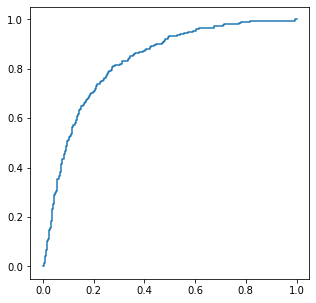

In [19]:
plot_roc_curve(y_test, y_pred_prob_log)

In [32]:
x_train_log_scaled = StandardScaler().fit_transform(x_train_log)
x_test_log_scaled = StandardScaler().fit_transform(x_test_log)
log_model = LogisticRegression()
log_model.fit(x_train_log_scaled, y_train.values.ravel())
y_pred_prob_log = log_model.predict_proba(x_test_log_scaled)

0.8284786545024028


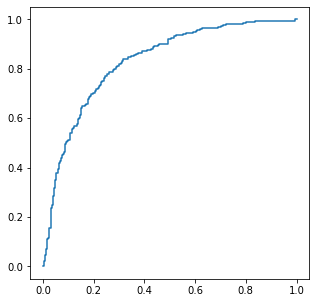

In [33]:
plot_roc_curve(y_test, y_pred_prob_log)

In [20]:
x_train_box = np.zeros_like(x_train)
x_test_box = np.zeros_like(x_test)
x_train_box[:, 0] = stats.boxcox(x_train.values[:, 0])[0]
x_train_box[:, 1] = stats.boxcox(x_train.values[:, 1])[0]
x_test_box[:, 0] = stats.boxcox(x_test.values[:, 0])[0]
x_test_box[:, 1] = stats.boxcox(x_test.values[:, 1])[0]

In [21]:
box_model = LogisticRegression()
box_model.fit(x_train_box, y_train.values.ravel())
y_pred_prob_box = box_model.predict_proba(x_test_box)

0.6030799498572323


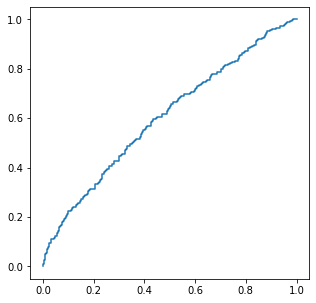

In [22]:
plot_roc_curve(y_test, y_pred_prob_box)

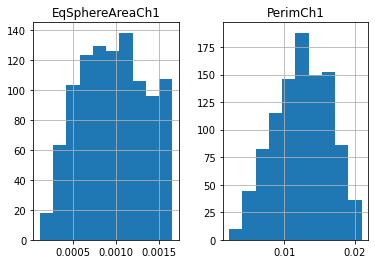

array([[<AxesSubplot:title={'center':'EqSphereAreaCh1'}>,
        <AxesSubplot:title={'center':'PerimCh1'}>]], dtype=object)

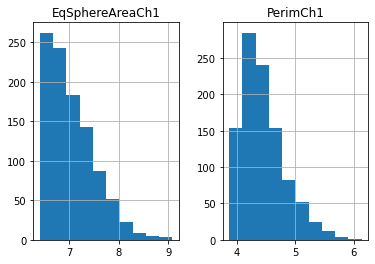

In [25]:
x_train_log.hist()